In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load both left and right eye dataset
base_path = '/content/drive/MyDrive/ResearchWork_2023'
left_df = pd.read_excel(f'{base_path}/updated_left_eye.xlsx')
right_df = pd.read_excel(f'{base_path}/updated_right_eye.xlsx')


In [ ]:
!unzip '/content/drive/MyDrive/ResearchWork_2023/cropped_images_zip/cropped_training_images.zip'

In [ ]:
left_df.head()

,Unnamed: 0,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,0_left.jpg,cataract,0,0,0,1,0,0,0,0
1,1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0
4,4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1


In [ ]:
right_df.head()

,Unnamed: 0,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0
1,1,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3,3,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,4_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [ ]:
df = pd.concat([left_df, right_df], axis=0)
df.head()


,Unnamed: 0,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,0_left.jpg,cataract,0,0,0,1,0,0,0,0
1,1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0
4,4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1


In [ ]:
df.tail()

,Unnamed: 0,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O
3478,3495,4686_right.jpg,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3479,3496,4688_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3480,3497,4689_right.jpg,normal fundus,1,0,0,0,0,0,0,0
3481,3498,4690_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3482,3499,4784_right.jpg,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0


In [ ]:
df.shape


(6968, 11)

In [ ]:
# Input pipeline
base_path = '/content/cropped_training_images/'
image_name = base_path + df['Fundus']
image_name[:5]

0    /content/cropped_training_images/0_left.jpg
1    /content/cropped_training_images/1_left.jpg
2    /content/cropped_training_images/2_left.jpg
3    /content/cropped_training_images/3_left.jpg
4    /content/cropped_training_images/4_left.jpg
Name: Fundus, dtype: object

In [ ]:
labels = df.loc[:,['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']]
labels = labels.values

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
labels.shape

(6968, 8)

In [ ]:
labels = tf.constant(labels, dtype=tf.float32)

In [ ]:
image_name

0           /content/cropped_training_images/0_left.jpg
1           /content/cropped_training_images/1_left.jpg
2           /content/cropped_training_images/2_left.jpg
3           /content/cropped_training_images/3_left.jpg
4           /content/cropped_training_images/4_left.jpg
                             ...                       
3478    /content/cropped_training_images/4686_right.jpg
3479    /content/cropped_training_images/4688_right.jpg
3480    /content/cropped_training_images/4689_right.jpg
3481    /content/cropped_training_images/4690_right.jpg
3482    /content/cropped_training_images/4784_right.jpg
Name: Fundus, Length: 6968, dtype: object

In [ ]:
labels

<tf.Tensor: shape=(6968, 8), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [ ]:
# Create a function to load the images using TensorFlow's `tf.io.read_file` function and `tf.image.decode_jpeg` function.
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [250, 250])
    image /= 255.0  # normalize the pixels
#     image = tf.expand_dims(image, axis=0) # Add a batch dimension to the image
#     label = tf.transpose(label)
    return image, label

In [ ]:
# labels.T

In [ ]:
# Load the images and their labels into a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((image_name, labels))
dataset = dataset.map(load_image)
dataset = dataset.batch(32)

In [ ]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [ ]:
def split_data(dataset, train_split, test_split, val_split):
    # Calculate the size of each split
    dataset_size = dataset.reduce(tf.constant(0, dtype=tf.int64), lambda acc, _: acc + 1).numpy()
    train_size = int(dataset_size * train_split)
    val_size = int(dataset_size * val_split)
    test_size = int(dataset_size * test_split)

    # Shuffle the elements of the dataset randomly
    dataset = dataset.shuffle(buffer_size=dataset_size, seed=42)

    # Split the dataset into train, validation, and test sets
    train_dataset = dataset.take(train_size)
    remaining_dataset = dataset.skip(train_size)
    val_dataset = remaining_dataset.take(val_size)
    test_dataset = remaining_dataset.skip(val_size)
    return train_dataset, test_dataset, val_dataset

In [ ]:
train_dataset, test_dataset, val_dataset = split_data(dataset, train_split=0.7, test_split=0.15, val_split=0.15)

In [ ]:
from keras.applications import VGG19
base_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(250,250,3)
)
base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Unfreeze specific layers by their names
for layer in base_model.layers:
    if layer.name in ['block1_conv2', 'block2_conv2', 'block3_conv4', 'block4_conv4', 'block5_conv4']:
        layer.trainable = True

In [ ]:
# # Define the model architecture
# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(8, activation='sigmoid')
# ])

In [ ]:
base_model.input

<KerasTensor: shape=(None, 250, 250, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
x = base_model.output
x = tf.keras.layers.Flatten()(x)
fc1 = tf.keras.layers.Dense(units=2048, activation='relu')(x)
fc2 = tf.keras.layers.Dense(units=1024, activation='relu')(fc1)
output_layer = tf.keras.layers.Dense(units=8, activation='sigmoid')(fc2)

In [ ]:
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa
accuracy = tf.keras.metrics.Accuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1_score = tfa.metrics.F1Score(num_classes=8)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
# Compile the model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
               loss='binary_crossentropy',
              metrics=['accuracy', precision , recall, f1_score])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision , recall, f1_score])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
# Train the model
history = model.fit(train_dataset, epochs=50, batch_size=32, validation_data=test_dataset)

Epoch 1/50
152/152 [==============================] - 241s 1s/step - loss: 0.3452 - accuracy: 0.3834 - precision: 0.4283 - recall: 0.1336 - f1_score: 0.0933 - val_loss: 0.3261 - val_accuracy: 0.3722 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0678
Epoch 2/50
152/152 [==============================] - 206s 976ms/step - loss: 0.3266 - accuracy: 0.4248 - precision: 0.4901 - recall: 0.1372 - f1_score: 0.1057 - val_loss: 0.3437 - val_accuracy: 0.3989 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0713
Epoch 3/50
152/152 [==============================] - 206s 964ms/step - loss: 0.3344 - accuracy: 0.4291 - precision: 0.3682 - recall: 0.0895 - f1_score: 0.0952 - val_loss: 0.3382 - val_accuracy: 0.4292 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0751
Epoch 4/50
152/152 [==============================] - 206s 963ms/step - loss: 0.3352 - accuracy: 0.3678 - precision: 0.2874 - recall: 0.0287 - f1_score: 0.0839 - val_los

In [ ]:
model.save('/content/drive/MyDrive/ResearchWork_2023/models/model_1_v2.h5')

In [ ]:
import matplotlib.pyplot as plt

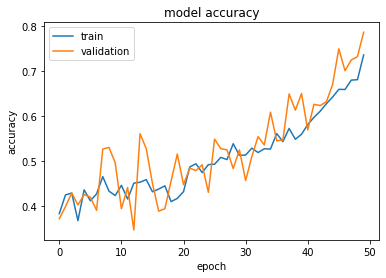

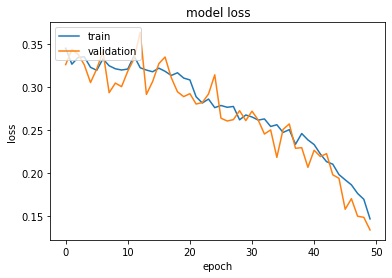

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()